In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Práctica Aproximación a la calidad de datos 

In [3]:
df = pd.read_csv('titulares_prestacion_alimentar-2023-08-01.csv')
df.head()

,persona_id,sexo,edad,provincia_id,provincia,departamento_id,departamento,monto_ultima_liquidacion,periodo_desde,periodo_hasta
0,413f389c-d94d-43d3-b00c-c58419562331,M,88,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",17000,2022-05-01,2023-04-01
1,330e50e9-ff39-44dc-a882-b3255c2c7395,M,90,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",17000,2020-03-01,2022-03-01
2,4c6be991-231f-4dc2-92c3-487819d2dd91,M,85,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",17000,2022-01-01,2022-05-01
3,20b21518-ac89-459a-88f8-d4aa2e48ae21,M,81,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",17000,2022-12-01,2023-01-01
4,6626c34f-9088-492f-a016-4f72fa8ddcea,M,72,2,Ciudad de Buenos Aires,2000,"Comuna 1,Comuna 10,Comuna 11,Comuna 12,Comuna ...",34000,2021-05-01,2021-09-01


### a) Analizamos consistencia entre pares

Analizaremos provincia_id junto con provincia y departamento_id junto con departamento

In [115]:
df.groupby(['provincia', 'provincia_id']).size()

provincia               provincia_id
Buenos Aires            2                   281
                        6               1372951
Catamarca               10                34928
Chaco                   22               145446
Chubut                  26                40775
Ciudad de Buenos Aires  2                126813
Corrientes              18               115298
Córdoba                 14               285807
Entre Ríos              30               101245
Formosa                 34                65931
Jujuy                   38                74023
La Pampa                42                23742
La Rioja                46                33260
Mendoza                 50               166639
Misiones                54               141589
Neuquén                 58                48429
Río Negro               62                55504
Salta                   66               150081
San Juan                70                74525
San Luis                74                43003
San

Viendo el output anterior vemos que Buenos Aires tiene dos provincia_id posibles, 2 y 6 pero tambien 2 es el provincia_id asociado a Ciudad de Buenos Aires. Veamos de que se tratan esos registros que tienen provincia_id 6 y provincia Buenos Aires

In [116]:
print(df[(df['provincia_id'] == 2) & (df['provincia'] == 'Buenos Aires')])
print(np.unique(df[(df['provincia_id'] == 2) & (df['provincia'] == 'Buenos Aires')]['departamento']))

                                   persona_id sexo  edad  provincia_id  \
3473615  47c0e820-db18-4985-8464-dae72c0db3b4    M    58             2   
3473616  1fbbb5c6-5382-41a5-81a0-43ad3f62fa57    M    52             2   
3473617  d734b6b7-4c4e-4807-bb19-529bf6124812    M    50             2   
3473618  be786704-9cee-4a7f-96e1-c9b2943ecd52    M    49             2   
3473619  11f5767d-3319-4338-b15d-c3b7c6eb0728    M    46             2   
...                                       ...  ...   ...           ...   
3473891  2700a00b-d924-41af-ad25-2db334799183    F    41             2   
3473892  f6f321c9-0515-4f9e-abf9-6b2832f7b617    F    36             2   
3473893  220db70b-7753-402b-9802-5e894c1d26c4    F    34             2   
3473894  b81e84a8-e76d-4a09-990a-8912c3aa5c0b    F    24             2   
3473895  841511d9-baf8-4638-bb7c-d79a308cd690    F    32             2   

            provincia  departamento_id departamento  monto_ultima_liquidacion  \
3473615  Buenos Aires         

Vemos que los registros que indican 2 como provincia_id y Buenos Aires como provincia, el unico departamento es Lezama.

Pasemos a analizar departamento_id y departamento

In [117]:
inconsistent_pairs = df.groupby('departamento')['departamento_id'].nunique().reset_index()
print(inconsistent_pairs[inconsistent_pairs['departamento_id'] > 1])


                      departamento  departamento_id
3                       25 de Mayo                5
4                       9 de Julio                5
5                    Adolfo Alsina                2
11                 Almirante Brown                2
24                      Avellaneda                3
25                        Ayacucho                2
33                        Belgrano                3
39                         Bermejo                2
55                         Capital               11
69                       Chacabuco                3
84                           Colón                3
91                      Concepción                2
100               Coronel Pringles                2
133            Florentino Ameghino                2
142                 General Alvear                3
145               General Belgrano                3
148                 General Güemes                2
160                    General Paz                2
164         

Vemos que para el caso departamento-departamento_id, los nombres de los departamentos se repiten mucho mas tambien debido a la naturaleza de estos. En diferentes provincias pueden haber distintos departamentos llamados del mismo modo.

### b) Generar una nueva variable que se llame duración, que represente el período durante el cual se accedió al beneficio. 

In [118]:
df['duracion'] = pd.to_datetime(df['periodo_hasta']) - pd.to_datetime(df['periodo_desde'])

df['duracion']

0          335 days
1          730 days
2          120 days
3           31 days
4          123 days
             ...   
3675999    822 days
3676000    578 days
3676001    671 days
3676002   1126 days
3676003    579 days
Name: duracion, Length: 3676004, dtype: timedelta64[ns]

### c) Efectuar una apreciación sobre la unicidad, la actualidad y la consistencia del dataset. Para la consistencia verificar si es posible utilizar datasets externos. 

In [119]:
# Unicidad
print(len(df)) # Numero total de registros

print(df['persona_id'].nunique()) # Numero de personas unicas

3676004
3676004


Para analizar la consistencia vamos a comparar la distribucion porcentual de las tarjetas alimentar con la distribucion poblacional usando como fuente los datos del Censo 2022 publicados en https://censo.gob.ar/

In [57]:
distribucion_poblacional = pd.read_json('distribucion_poblacional.json', orient='index')

# Reset the index and rename the columns
distribucion_poblacional = distribucion_poblacional.reset_index().rename(columns={'index': 'provincia', 0: 'porcentaje_poblacion'})
distribucion_poblacional

,provincia,porcentaje_poblacion
0,Buenos Aires,38.16
1,Córdoba,8.64
2,Santa Fe,7.72
3,Ciudad de Buenos Aires,6.78
4,Mendoza,4.38
5,Tucumán,3.70
6,Salta,3.13
7,Entre Ríos,3.10
8,Misiones,2.78
9,Corrientes,2.60


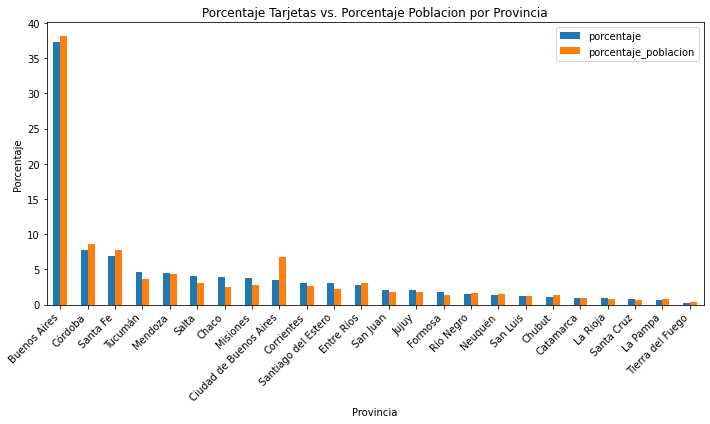

In [66]:
# Consistencia
counts = df['provincia'].value_counts()

provincia_percentages = (counts / len(df)) * 100

df_plot = pd.DataFrame({'provincia': provincia_percentages.index, 'porcentaje': provincia_percentages.values})

df_plot = df_plot.merge(pd.DataFrame.from_dict(distribucion_poblacional), on='provincia', how='inner')
df_plot

# Create a bar plot for 'porcentaje' and 'porcentaje_poblacion' columns
ax = df_plot.plot(kind='bar', figsize=(10, 6))
df_plot.set_index('provincia', inplace=True)

# Set labels and title
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.title('Porcentaje Tarjetas vs. Porcentaje Poblacion por Provincia')

# Display province names on the x-axis
ax.set_xticklabels(df_plot.index, rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

Basándonos en el gráfico previo, es evidente que la distribución de las tarjetas alimentarias se asemeja a la distribución poblacional a nivel provincial en su mayoría. No obstante, hay excepciones notables, como es el caso de la Ciudad de Buenos Aires. Esto podría explicarse por las diferencias en los niveles de pobreza presentes en cada jurisdicción, siendo la Ciudad de Buenos Aires notablemente menos afectada por la pobreza en comparación con otras regiones. La inclusión de datos externos procedentes de otras fuentes relacionados con el salario promedio o los niveles de pobreza a nivel provincial o incluso municipal podría contribuir a perfeccionar la evaluación de la distribución en el conjunto de datos. 

### d) Efectuar un análisis descriptivo de cada una de las variables, incluyendo el % de datos faltantes 

In [ ]:
# persona_id
"""
El id de la persona es unico para cada persona, por es unico para cada registro de la tabla y todo registro tiene un id de persona.
En el contexto de esta tabla, el id parece estar anonimizado, ya que no se puede relacionar con ningun otro dato de la tabla para identificar a la persona. 
"""

print('Cantidad de persona_id distintos:', len(df['persona_id'].unique()), 'vs Cantidad de registros:', len(df))

Cantidad de persona_id distintos: 3676004 vs Cantidad de registros: 3676004


In [122]:
# sexo
"""
El sexo es unico para cada persona, por es unico para cada registro de la tabla y todo registro tiene un sexo
Es una variable categorica con tres posibles valores: F, M y X
El valor F es el mas frecuente
"""

print(df.sexo.value_counts() / len(df))
print('Cantidad de personas con sexo:', df.sexo.value_counts().sum(), 'vs Cantidad de registros:', len(df))


F   1
M   0
X   0
Name: sexo, dtype: float64
Cantidad de personas con sexo: 3676004 vs Cantidad de registros: 3676004


In [1]:
# edad

"""
La edad es unica para cada persona, es unico para cada registro de la tabla y todo registro tiene una edad
Es una variable numerica continua
El promedio de edad es de 34 años, la edad minima es de 0 años y la edad maxima es de 123 años
"""

pd.options.display.float_format = '{:.0f}'.format
print(df['edad'].describe())
sns.boxplot(df['edad'], whis=3)
print('Cantidad de personas con edad:', df.edad.value_counts().sum(), 'vs Cantidad de registros:', len(df))

NameError: name 'pd' is not defined

In [124]:
# provincia_id y provincia

"""
La provincia y provincia_id es unica para cada persona, es unico para cada registro de la tabla y todo registro tiene una edad
Es una variable categorica con 24 posibles valores
Describe la provincia de residencia de la persona
El valor mas frecuente es Buenos Aires
"""

print(df['provincia'].describe())
print('Cantidad de personas con provincia:', df.provincia.value_counts().sum(), 'vs Cantidad de registros:', len(df))

count          3676004
unique              24
top       Buenos Aires
freq           1373232
Name: provincia, dtype: object
Cantidad de personas con provincia: 3676004 vs Cantidad de registros: 3676004


count   3676004
mean      21316
std        6104
min       17000
25%       17000
50%       17000
75%       26000
max       34000
Name: monto_ultima_liquidacion, dtype: float64
17000    2322749
26000     892587
34000     460668
Name: monto_ultima_liquidacion, dtype: int64


<AxesSubplot:title={'center':'Porcentaje de registro por ultimo monto de liquidacion'}, xlabel='Monto Ultima Liquidacion', ylabel='Porcentaje de registros'>

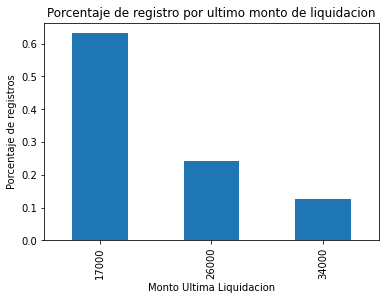

In [125]:
# monto_ultima_liquidacion

"""
El monto_ultima_liquidacion indica el monto de la ultima liquidacion de la persona en la provincia y periodo indicado
Es una variable numerica continua
No se observan valores nulos
vemos que hay tres valores posibles 17000, 26000 y 34000
"""

print(df['monto_ultima_liquidacion'].describe())

"""
Al ver un describe de la variable monto_ultima_liquidacion se observa que el valor minimo es 17000 y el valor maximo es 34000.
"""
mul_value_counts = df['monto_ultima_liquidacion'].value_counts()
print(mul_value_counts)
(mul_value_counts / len(df)).plot(
    kind='bar', 
    xlabel='Monto Ultima Liquidacion', 
    ylabel='Porcentaje de registros', 
    title='Porcentaje de registro por ultimo monto de liquidacion'
)


In [127]:
# periodo_desde

"""
El periodo_desde indica la fecha de inicio de la liquidacion
La variable toma la forma de una fecha que indica el primer dia del mes.
Tiene 34 valores diferentes
"""

print(df['periodo_desde'].describe())
print(df['periodo_desde'].value_counts())
print('Cantidad de personas con periodo_desde:', df.periodo_desde.value_counts().sum(), 'vs Cantidad de registros:', len(df))

"""
Vemos que no hay datos nulos pero vemos que en ciertos meses no se iniciaron liquidaciones, por ejemplo 2022-08-01 y 2021-09-01 entre otros.
El valor mas frecuente es 2021-08-01
"""

# periodo_hasta
    
"""
El periodo_hasta indica la fecha de fin de la liquidacion
La variable toma la forma de una fecha que indica el primer dia del mes.
"""

print(df['periodo_hasta'].describe())
print(df['periodo_hasta'].value_counts())
print('Cantidad de personas con periodo_hasta:', df.periodo_desde.value_counts().sum(), 'vs Cantidad de registros:', len(df))

"""
El valor mas frecuente es 2023-08-01, que es el mes de la actualizacion de los datos
"""


count        3676004
unique            34
top       2021-05-01
freq          833042
Name: periodo_desde, dtype: object
2021-05-01    833042
2020-03-01    582280
2020-02-01    454661
2020-01-01    400567
2020-09-01    257093
2021-10-01    135216
2022-05-01    111723
2022-02-01    104494
2021-07-01     96667
2020-04-01     85269
2022-04-01     64079
2022-01-01     43649
2023-08-01     41784
2022-06-01     38507
2021-12-01     36308
2021-11-01     33632
2022-03-01     32987
2022-07-01     32137
2023-01-01     30097
2022-09-01     29423
2022-12-01     28994
2022-11-01     27549
2023-07-01     26591
2022-10-01     26038
2023-04-01     24530
2023-03-01     23393
2023-05-01     23159
2023-02-01     22476
2023-06-01     22273
2019-12-01      6920
2020-05-01       451
2021-06-01        13
2020-08-01         1
2020-10-01         1
Name: periodo_desde, dtype: int64
Cantidad de personas con periodo_desde: 3676004 vs Cantidad de registros: 3676004
count        3676004
unique            34
top      

In [128]:
# duracion

"""
La duracion es una variable calculada a partir de las variables periodo_desde y periodo_hasta
Vemos que la mediana de la duracion es de 822 dias. 
El minimo es de 0 dias, por lo que hay personas que solo cobraron una vez.
"""

print(df['duracion'].describe())

count                        3676004
mean     770 days 08:33:10.590216928
std      451 days 07:35:41.716531680
min                  0 days 00:00:00
25%                365 days 00:00:00
50%                822 days 00:00:00
75%               1248 days 00:00:00
max               1339 days 00:00:00
Name: duracion, dtype: object
